## 4일차 의사결정나무
### sklearn의 GridSearchCV 함수를 사용해 최적의 매개 변수를 구하고, 최종 의사결정나무 모델을 만들고 해석하라. (모델 최적화, 인터넷 활용 GridSearchCV 조사)
### 데이터 : 유방암 데이터(변수: 31개, 자료 수: 569개)
### -목표변수(diagnosis, 0: Malignant(악성,357개), 1: Benign(양성,212개) 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
#os: 환경설정 패키지
import os
matplotlib.rc('font',family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus']=False
%matplotlib inline
# sklearn.tree 의 DecisionTreeClassifier: 분류의사결정나무
from sklearn.tree import DecisionTreeClassifier
# sklearn.tree의 export_graphviz: graphviz 패키지가 사용할 수 있는 .dot 확장자 파일로 저장
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.tree import export_graphviz
# graphviz import: 의사결정 나무 모델 시각화. .dot 확장자 파일 불러오는 패키지
import graphviz

In [3]:
bcancer = pd.read_csv("./과제파일/유방암.csv",engine = "python")
bcancer.isnull().sum() # 결측치 없음
bcancer.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# # random seed 고정 -> 매번 실행 시 같은 값을 얻음
# np.random.seed(seed = 1234)
# # 0.7(70%) 보다 작으면 True -> train 데이터, 아니면 False -> test 데이터
# msk = np.random.rand(bcancer.shape[0]) < 0.7
# bcancer_train = bcancer[msk]
# bcancer_test = bcancer[~msk]
# # train/test 데이터의 목표변수 설명변수 지정
# bcancer_train_y = bcancer_train["diagnosis"]
# bcancer_train_x = bcancer_train.drop("diagnosis", axis = 1, inplace = False)
# bcancer_test_y = bcancer_test["diagnosis"]
# bcancer_test_x = bcancer_test.drop("diagnosis", axis = 1, inplace = False)
# # train 데이터와 test 데이터 크기
# print("train data X size : {}".format(bcancer_train_x.shape))
# print("train data Y size : {}".format(bcancer_train_y.shape))
# print("test data X size : {}".format(bcancer_test_x.shape))
# print("test data Y size : {}".format(bcancer_test_y.shape))
# # x = bcancer.drop("diagnosis", axis = 1, inplace = False)
# # y = bcancer["diagnosis"]
# # bcancer_train_x, bcancer_test_x, bcancer_train_y, bcancer_test_y = train_test_split(x, y, test_size=0.2, random_state=2)
# # 이걸로 train test 데이터 나누는게 가능하고 트레인 0.7 / 테스트 0.3으로 나누는 이유는 없다.

## 의사결정나무 모델 생성

In [6]:
x = bcancer.drop("diagnosis", axis = 1, inplace = False)
y = bcancer["diagnosis"]
bcancer_train_x, bcancer_test_x, bcancer_train_y, bcancer_test_y = train_test_split(x, y, test_size=0.3, random_state=1234)
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
parameters = {'criterion':('gini', 'entropy'),
              'min_samples_split':[2,3,4,5],
              'min_samples_leaf':[i for i in range(1,11)],
              'max_leaf_nodes':[2,3,4,5,6,7,8,9,10],
              'max_depth':[i for i in range(1,11)],
             }

# cross_validation = StratifiedKFold(all_classes(target값 들어감.), n_folds=10)
dtc = DecisionTreeClassifier(random_state=1234)
gsearch = GridSearchCV(dtc, param_grid = parameters,cv=5, n_jobs = -1) # 보통 cv = 5로 두고 KFolds 진행.
gsearch.fit(bcancer_train_x, bcancer_train_y)
print("Best Score: {}".format(gsearch.best_score_))
print("Best params: {}".format(gsearch.best_params_))
print("Best estimators: {}".format(gsearch.best_estimator_))
# gsearch.cv_results_ # 이건 경우의 수 따져서 돌아간 걸 출력해주는 메소드임.

Best Score: 0.9447236180904522
Best params: {'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best estimators: DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best')


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [7]:
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(bcancer_train_x, bcancer_train_y)
# 훈련 데이터 정확도
print("Accucary on training set: {:.3f}".format(tree_uncustomized.score(bcancer_train_x, bcancer_train_y)))
# test 데이터 정확도
print("Accucary on test set: {:.3f}".format(tree_uncustomized.score(bcancer_test_x, bcancer_test_y)))

Accucary on training set: 1.000
Accucary on test set: 0.930


In [8]:
d = gsearch.best_params_

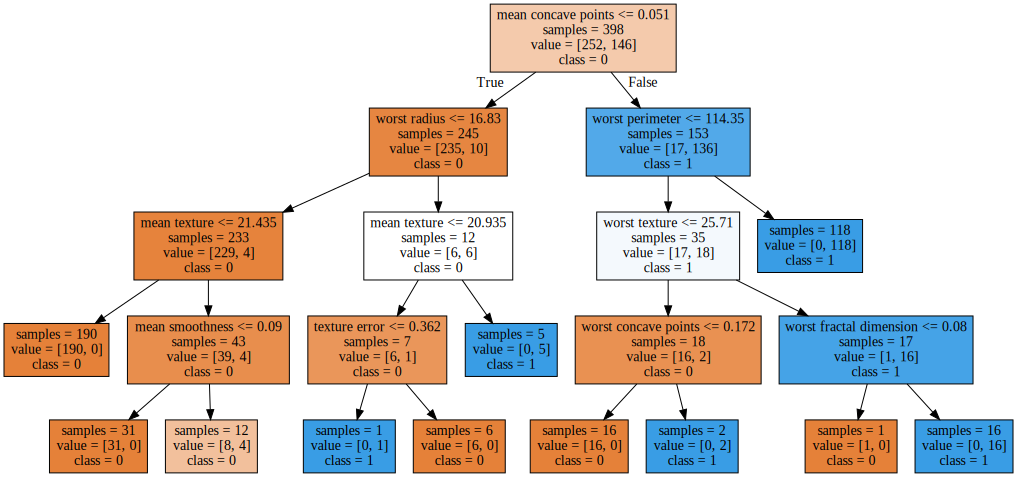

In [9]:
tree = DecisionTreeClassifier(criterion = d["criterion"], max_depth = d["max_depth"], min_samples_leaf = d['min_samples_leaf'], min_samples_split = d['min_samples_split'],  random_state=1234)
tree.fit(bcancer_train_x,bcancer_train_y)

export_graphviz(tree, out_file="tree.dot",class_names=["0","1"],\
               feature_names = bcancer_train_x.columns, impurity=False,filled=True)
os.environ["PATH"]+=os.pathsep + "/usr/local/bin/dot"

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [10]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
ds_feature_importance = pd.DataFrame()
ds_feature_importance["Feature"] = bcancer_train_x.columns
ds_feature_importance["Importance"] = tree.feature_importances_
# ds_feature_importance의 테이블을 중요도별로 정렬
ds_feature_importance.sort_values("Importance", ascending=False).round(3)

,Feature,Importance
7,mean concave points,0.655
22,worst perimeter,0.115
21,worst texture,0.056
20,worst radius,0.052
1,mean texture,0.049
27,worst concave points,0.025
4,mean smoothness,0.022
29,worst fractal dimension,0.015
11,texture error,0.011
19,fractal dimension error,0.000


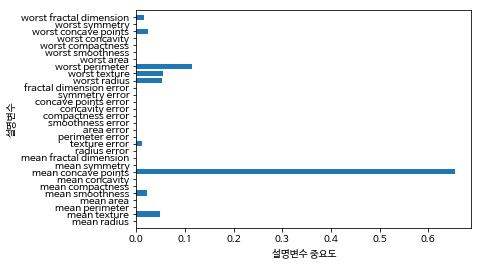

In [11]:
# 설명변수 중요도 그래프 함수 정의
def plot_feature_importances(model):
    n_features = bcancer_train_x.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features),  bcancer_train_x.columns)
    plt.xlabel("설명변수 중요도")
    plt.ylabel("설명변수")
    plt.ylim(-1, n_features)

# 설명변수 중요도 그래프 함수 실행
plot_feature_importances(tree)